<a href="https://colab.research.google.com/github/erreforandy/JJ/blob/master/Deteccion_de_enfermedades_manzanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
!pip install -U git+https://github.com/albumentations-team/albumentations

  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-f4yt6r8s
  Running command git clone -q https://github.com/albumentations-team/albumentations /tmp/pip-req-build-f4yt6r8s
     |████████████████████████████████| 952kB 2.8MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp36-none-any.whl size=65206 sha256=469994e6da0cf65e03e1f8f657432ec6cf812b7c22b8f30f03d21966cab2a571
  Stored in directory: /tmp/pip-ephem-wheel-cache-y3pcpdss/wheels/6f/77/82/86baf8aeda64a6de0f890cd0f2fb31acaf5545cc9c99ad21ba
Successfully built albumentations
  Found existing installation: imgaug 0.2.6
    Uninstalling imgaug-0.2.6:
      Successfully uninstalled imgaug-0.2.6
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [29]:
#!cp drive/My\ Drive/plant-pathology-2020-fgvc7.zip .
#!unzip plant-pathology-2020-fgvc7.zip


Archive:  plant-pathology-2020-fgvc7.zip
  inflating: images/Test_0.jpg       
  inflating: images/Test_1.jpg       
  inflating: images/Test_10.jpg      
  inflating: images/Test_100.jpg     
  inflating: images/Test_1000.jpg    
  inflating: images/Test_1001.jpg    
  inflating: images/Test_1002.jpg    
  inflating: images/Test_1003.jpg    
  inflating: images/Test_1004.jpg    
  inflating: images/Test_1005.jpg    
  inflating: images/Test_1006.jpg    
  inflating: images/Test_1007.jpg    
  inflating: images/Test_1008.jpg    
  inflating: images/Test_1009.jpg    
  inflating: images/Test_101.jpg     
  inflating: images/Test_1010.jpg    
  inflating: images/Test_1011.jpg    
  inflating: images/Test_1012.jpg    
  inflating: images/Test_1013.jpg    
  inflating: images/Test_1014.jpg    
  inflating: images/Test_1015.jpg    
  inflating: images/Test_1016.jpg    
  inflating: images/Test_1017.jpg    
  inflating: images/Test_1018.jpg    
  inflating: images/Test_1019.jpg    
  inflati

In [30]:
#!mkdir ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json
#!kaggle competitions download plant-pathology-2020-fgvc7 --force

  0% 0.00/170k [00:00<?, ?B/s]
100% 170k/170k [00:00<00:00, 59.3MB/s]
  0% 0.00/204k [00:00<?, ?B/s]
100% 204k/204k [00:00<00:00, 66.3MB/s]
  0% 0.00/274k [00:00<?, ?B/s]
100% 274k/274k [00:00<00:00, 82.5MB/s]
  0% 0.00/214k [00:00<?, ?B/s]
100% 214k/214k [00:00<00:00, 63.4MB/s]
  0% 0.00/174k [00:00<?, ?B/s]
100% 174k/174k [00:00<00:00, 57.5MB/s]
  0% 0.00/238k [00:00<?, ?B/s]
100% 238k/238k [00:00<00:00, 75.1MB/s]
  0% 0.00/245k [00:00<?, ?B/s]
100% 245k/245k [00:00<00:00, 80.2MB/s]
  0% 0.00/220k [00:00<?, ?B/s]
100% 220k/220k [00:00<00:00, 67.1MB/s]
  0% 0.00/124k [00:00<?, ?B/s]
100% 124k/124k [00:00<00:00, 103MB/s]
  0% 0.00/218k [00:00<?, ?B/s]
100% 218k/218k [00:00<00:00, 70.7MB/s]
  0% 0.00/283k [00:00<?, ?B/s]
100% 283k/283k [00:00<00:00, 88.5MB/s]
  0% 0.00/232k [00:00<?, ?B/s]
100% 232k/232k [00:00<00:00, 59.7MB/s]
  0% 0.00/294k [00:00<?, ?B/s]
100% 294k/294k [00:00<00:00, 41.1MB/s]
  0% 0.00/290k [00:00<?, ?B/s]
100% 290k/290k [00:00<00:00, 40.0MB/s]
  0% 0.00/207k [00:00

In [1]:
import os
import numpy as np
import pandas as pd

import albumentations as A
import cv2

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim

from tqdm.notebook import tqdm
from torch.utils.data import Dataset, DataLoader
from albumentations.pytorch.transforms import ToTensorV2

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings  
warnings.filterwarnings('ignore')

In [7]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import GlobalAveragePooling2D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
import os 
import pandas as pd
import plotly.graph_objs as go
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [9]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train['image_id']=train['image_id']+'.jpg'
test['image_id']=test['image_id']+'.jpg'
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0.jpg,0,0,0,1
1,Train_1.jpg,0,1,0,0
2,Train_2.jpg,1,0,0,0
3,Train_3.jpg,0,0,1,0
4,Train_4.jpg,1,0,0,0


In [3]:
img=[]
filename=train.image_id
for file in filename:
    image=cv2.imread("images/"+file)
    res=cv2.resize(image,(256,256))
    img.append(res)
img=np.array(img)

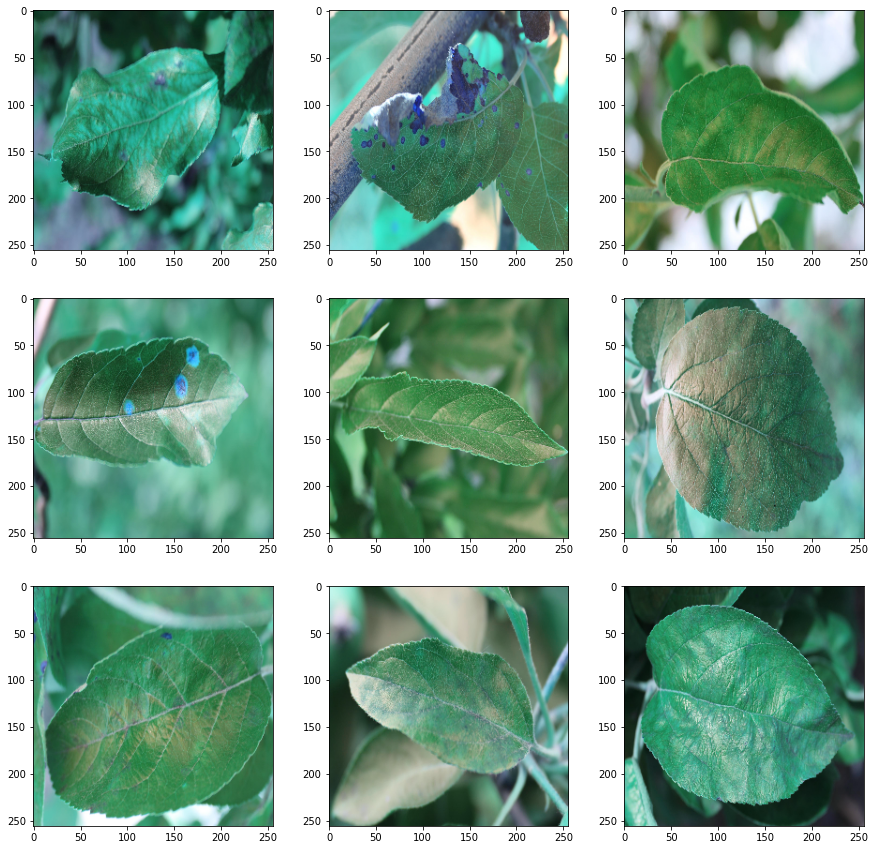

In [10]:
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(img[i])

In [8]:
train_labels = np.float32(train.loc[:, 'healthy':'scab'].values)

train, val = train_test_split(train, test_size = 0.15)

In [11]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( horizontal_flip=True,
    vertical_flip=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.1,
    fill_mode='nearest',
    shear_range=0.1,
    rescale=1/255,
    brightness_range=[0.5, 1.5])

In [13]:
train_generator=train_datagen.flow_from_dataframe(train,directory='images/',
                                                      target_size=(384,384),
                                                      x_col="image_id",
                                                      y_col=['healthy','multiple_diseases','rust','scab'],
                                                      class_mode='raw',
                                                      shuffle=False,
                                                       subset='training',
                                                      batch_size=32)

Found 1821 validated image filenames.


In [14]:
val_generator=train_datagen.flow_from_dataframe(val,directory='images/',
                                                      target_size=(384,384),
                                                      x_col="image_id",
                                                      y_col=['healthy','multiple_diseases','rust','scab'],
                                                      class_mode='raw',
                                                      shuffle=False,
                                                      batch_size=32,
                                                  )

Found 274 validated image filenames.


In [15]:
test_generator=train_datagen.flow_from_dataframe(test,directory='images/',
                                                      target_size=(384,384),
                                                      x_col="image_id",
                                                      y_col=None,
                                                      class_mode=None,
                                                      shuffle=False,
                                                      batch_size=32)

Found 1821 validated image filenames.


In [16]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
from keras import optimizers
model_finetuned = ResNet50(include_top=False, weights='imagenet', input_shape=(384,384,3))
x = model_finetuned.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
predictions = Dense(4, activation="softmax")(x)
model_finetuned = Model(inputs=model_finetuned.input, outputs=predictions)
model_finetuned.compile(optimizer='adam',
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])
model_finetuned.summary()

94658560/94653016 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 384, 384, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 390, 390, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 192, 192, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 192, 192, 64) 256         conv1[0][0]                      
___________________________

In [ ]:
from keras.callbacks import ReduceLROnPlateau
history_1 = model_finetuned.fit_generator(train_generator,                                    
                                  steps_per_epoch=100, 
                                  epochs=25,validation_data=val_generator,validation_steps=100
                                  ,verbose=1,callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],use_multiprocessing=False,
               shuffle=True)

Epoch 1/25


In [ ]:
fig = go.Figure(data=[
    go.Line(name='train_acc', x=history_1.epoch, y=history_1.history['accuracy']),
    go.Line(name='Val_acc', x=history_1.epoch, y=history_1.history['val_accuracy'])])

fig.update_layout(
    title="Accuracy",
    xaxis_title="epoch",
    yaxis_title="accuracy",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    ))
fig